# The cross check with Adam: the interference term

## Function $f(\sigma)$

### Adam's code
```fortran
     double complex function f(s)
      implicit double precision (a-h,o-z)
      double complex xi,s
      xi = (0.d0,1.d0)
c  ----  LL                                                                                            
      f = 1./(9. - s - 0.5*xi*cdsqrt(s-4.))
c  ----  RR                                                                                                 
c      f = 1./(9. - s + 0.5*cdsqrt(4.-s))                                                                
      return
      end
```

The second sheet function is done by
```fortran
      dconjg(f(s3))
```
I have no idea how it could be right at the complex plane!

### Misha's code

In [64]:
f(σ) = 1/(9-σ-0.5im*sqrt(σ-4))
fs(σ) = 1/(9-σ+0.5im*sqrt(σ-4))

fs (generic function with 1 method)

In [69]:
f(7)

0.42105263157894735 + 0.18232113763882918im

## Sigma3 plus minus part
### Adam's code
```fortran
      double complex function sp(s1)
      implicit double precision (a-h,o-z)
      double complex s,s1
      common /stot/ s
      sp = (s + 3. - s1)/2. +
     $cdsqrt(s1*(s1-4)*(s**2+s1**2+1-2*s1-2*s-2*s1*s))/(2.*s1)
      return
      end


      double complex function sm(s1)
      implicit double precision (a-h,o-z)
      double complex s,s1
      common /stot/ s
      sm = (s + 3. - s1)/2. -
     $     cdsqrt(s1*(s1-4)*(s**2+s1**2+1-2*s1-2*s-2*s1*s))/(2.*s1)
      return
      end
```
__Comment__: Adam, be careful with the sqrt `cdsqrt(s1*(s1-4)*(s**2+s1**2+1-2*s1-2*s-2*s1*s))/(2.*s1)`.
__Your expression has dangerous cut location!__

### Misha's code

In [119]:
σ3pm(s,σ1) = (s+3-σ1)/2 + sqrt(σ1*(σ1-4)*(s^2+σ1^2+1-2σ1-2s-2σ1*s))/(2σ1)*[-1,1]

σ3pm (generic function with 1 method)

In [128]:
using Cuba
function ρINT(s)
    function integrand(x,t)
        σ1min=4; σ1max=(√s-1)^2
        σ1 = (1-x[1])*σ1min + x[1]*σ1max
        #
        σ3min, σ3max = σ3pm(s,σ1)
        σ3 = (1-x[2])*σ3min + x[2]*σ3max
        #
        res = fs(σ1)*f(σ3)*(σ1max-σ1min)*(σ3max-σ3min)
        t[1],t[2] = reim(res)
    end
    complex(cuhre(integrand,2,2)[1]...)/s
end

ρINT (generic function with 1 method)

In [3]:
using Plots

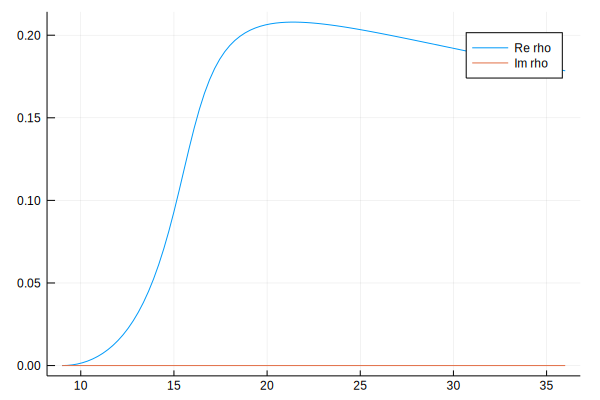

In [131]:
let sv=linspace(3^2,6^2,100)
    cal = ρINT.(sv)
    plot(sv,[real.(cal), imag.(cal)], lab=["Re rho" "Im rho"])
end

## Appendix
## Adam expression of the sqrt

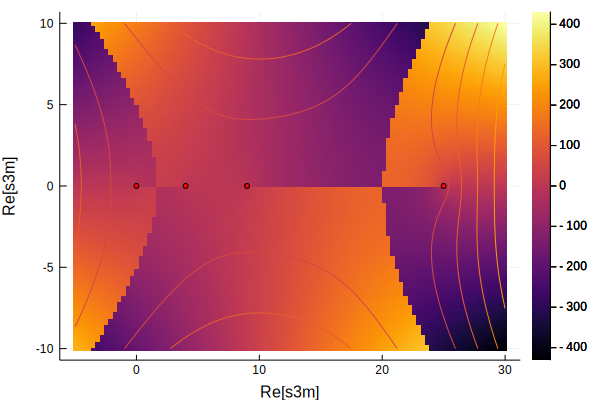

In [27]:
let xv=linspace(-5,30,100), yv=linspace(-10,10,100), s = 4^2
    g = σ1->sqrt(σ1*(σ1-4)*(s^2+σ1^2+1-2σ1-2s-2*σ1*s))
    cal = [g(x+1im*y)[1] for y in yv, x in xv]
    heatmap(xv, yv, imag.(cal))
    contour!(xv, yv, real.(cal))
    scatter!([0im,4,(√s-1)^2,(√s+1)^2], lab="", m=(3,:red), xlab="Re[s3m]", ylab="Re[s3m]")
end